100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9769424877762795
Epoch 2 / 20, Loss: 0.9498427420854568
Epoch 3 / 20, Loss: 0.9360957469940185
Epoch 4 / 20, Loss: 0.9275414981245994
Epoch 5 / 20, Loss: 0.9216023210883141
Epoch 6 / 20, Loss: 0.9171987022757531
Epoch 7 / 20, Loss: 0.9137865810394287
Epoch 8 / 20, Loss: 0.9110592746734619
Epoch 9 / 20, Loss: 0.9088297709822655
Epoch 10 / 20, Loss: 0.9069767572879791
Epoch 11 / 20, Loss: 0.9054165386557579
Epoch 12 / 20, Loss: 0.9040894657969475
Epoch 13 / 20, Loss: 0.9029507668614387
Epoch 14 / 20, Loss: 0.9019673720002175
Epoch 15 / 20, Loss: 0.9011134197115898
Epoch 16 / 20, Loss: 0.90036832767725
Epoch 17 / 20, Loss: 0.8997158142924309
Epoch 18 / 20, Loss: 0.8991424030661583
Epoch 19 / 20, Loss: 0.8986369616389275
Epoch 20 / 20, Loss: 0.898190452337265


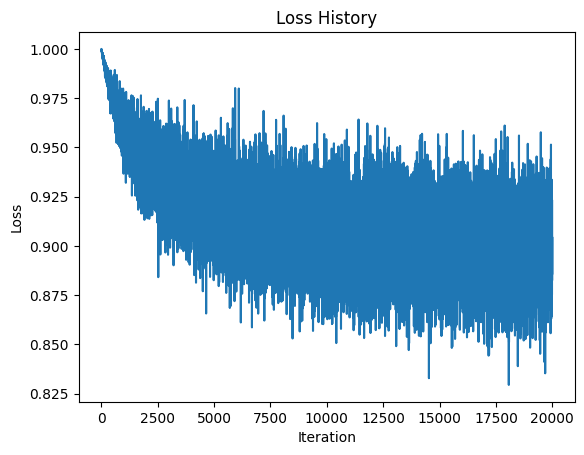

Training accuracy: 32.22%
Test accuracy: 32.38%


Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9769036821126937
Epoch 2 / 20, Loss: 0.9498011358380317
Epoch 3 / 20, Loss: 0.9360737816691399
Epoch 4 / 20, Loss: 0.9275267511606217
Epoch 5 / 20, Loss: 0.9215921345949173
Epoch 6 / 20, Loss: 0.9171911337971688
Epoch 7 / 20, Loss: 0.9137790152430534
Epoch 8 / 20, Loss: 0.9110532827973365
Epoch 9 / 20, Loss: 0.9088249573707581
Epoch 10 / 20, Loss: 0.9069731140732765
Epoch 11 / 20, Loss: 0.9054130397439003
Epoch 12 / 20, Loss: 0.9040863399505615
Epoch 13 / 20, Loss: 0.9029478748440742
Epoch 14 / 20, Loss: 0.9019648159742355
Epoch 15 / 20, Loss: 0.9011113119125366
Epoch 16 / 20, Loss: 0.90036654150486
Epoch 17 / 20, Loss: 0.8997140563130379
Epoch 18 / 20, Loss: 0.8991407369375228
Epoch 19 / 20, Loss: 0.8986354401707649
Epoch 20 / 20, Loss: 0.8981890431046486


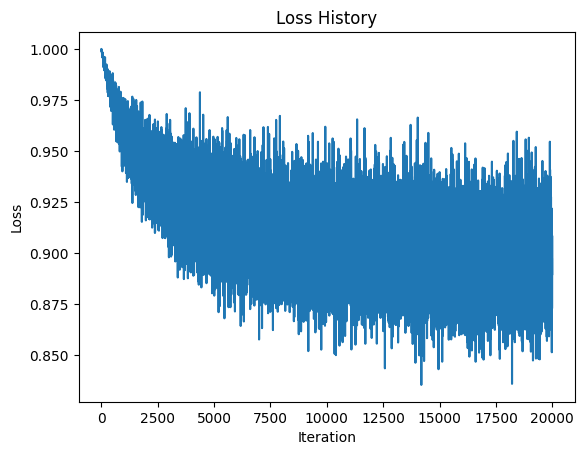

Training accuracy: 32.22%
Test accuracy: 32.41%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9902882298827171
Epoch 2 / 20, Loss: 0.9740726259946824
Epoch 3 / 20, Loss: 0.9619862082600593
Epoch 4 / 20, Loss: 0.9528054069280625
Epoch 5 / 20, Loss: 0.9457121231555938
Epoch 6 / 20, Loss: 0.9401472725868225
Epoch 7 / 20, Loss: 0.9357209479212761
Epoch 8 / 20, Loss: 0.9321564032435418
Epoch 9 / 20, Loss: 0.9292536907196045
Epoch 10 / 20, Loss: 0.9268661280870437
Epoch 11 / 20, Loss: 0.924884525179863
Epoch 12 / 20, Loss: 0.923226468026638
Epoch 13 / 20, Loss: 0.9218288946151734
Epoch 14 / 20, Loss: 0.9206432086825371
Epoch 15 / 20, Loss: 0.9196313171386719
Epoch 16 / 20, Loss: 0.9187631340622902
Epoch 17 / 20, Loss: 0.9180146797299386
Epoch 18 / 20, Loss: 0.9173666219115257
Epoch 19 / 20, Loss: 0.9168033515810966
Epoch 20 / 20, Loss: 0.9163120371103287


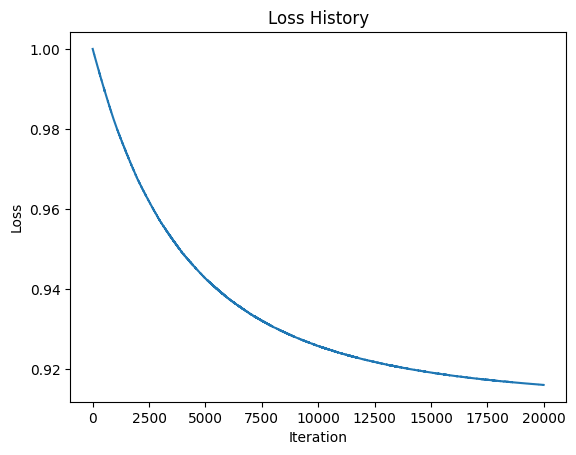

Training accuracy: 10.00%
Test accuracy: 10.00%


In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Number of neurons in hidden layer
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for input to hidden layer
b1 = torch.zeros(H)             # Biases for hidden layer
w2 = torch.randn(H, K) * std     # Weights for hidden to output layer
b2 = torch.zeros(K)              # Biases for output layer

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        hidden = x_train.mm(w1) + b1  # Hidden layer activation
        hidden = torch.sigmoid(hidden)  # Apply sigmoid activation
        y_pred = hidden.mm(w2) + b2    # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw2 = hidden.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        dhidden = dy_pred.mm(w2.t()) * (hidden * (1 - hidden))  # Derivative of sigmoid
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter updates
        w2 -= lr * dw2
        b2 -= lr * db2
        w1 -= lr * dw1
        b1 -= lr * db1

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 2.302607352733612
Epoch 2/20, Loss: 2.3026081624031067
Epoch 3/20, Loss: 2.302607451200485
Epoch 4/20, Loss: 2.3026077094078063
Epoch 5/20, Loss: 2.3026072454452513
Epoch 6/20, Loss: 2.3026079671382904
Epoch 7/20, Loss: 2.3026070001125336
Epoch 8/20, Loss: 2.3026084778308866
Epoch 9/20, Loss: 2.3026074504852296
Epoch 10/20, Loss: 2.3026075479984285
Epoch 11/20, Loss: 2.302607838630676
Epoch 12/20, Loss: 2.302607793331146
Epoch 13/20, Loss: 2.3026075880527497
Epoch 14/20, Loss: 2.302607449531555
Epoch 15/20, Loss: 2.3026068184375763
Epoch 16/20, Loss: 2.3026079630851743
Epoch 17/20, Loss: 2.3026073024272917
Epoch 18/20, Loss: 2.3026074655056
Epoch 19/20, Loss: 2.3026077191829684
Epoch 20/20, Loss: 2.3026075286865235


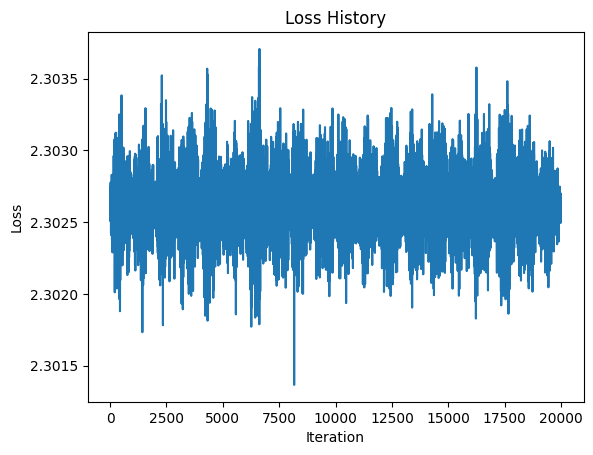

Training accuracy: 10.00%
Test accuracy: 10.00%


In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Weights for the input to hidden layer
b1 = torch.zeros(H)             # Bias for hidden layer
w2 = torch.randn(H, K) * std     # Weights for the hidden to output layer
b2 = torch.zeros(K)              # Bias for output layer

# Hyperparameters
iterations = 20
lr = 1e-4  # Learning rate
loss_history = []

# Sigmoid activation function
sigmoid = nn.Sigmoid()

# Softmax function to calculate probabilities
softmax = nn.Softmax(dim=1)

# 3. Training Loop
for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden = sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        y_pred = hidden.mm(w2) + b2            # Output layer activation
        probs = softmax(y_pred)                # Convert logits to probabilities
        
        # Calculate cross-entropy loss
        y_onehot = nn.functional.one_hot(labels, K).float()
        loss = -torch.sum(y_onehot * torch.log(probs)) / Ntr
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation and SGD updates
        # Output layer gradients
        dy_pred = probs - y_onehot  # Difference with true labels
        dw2 = hidden.t().mm(dy_pred) / Ntr
        db2 = dy_pred.sum(dim=0) / Ntr

        # Hidden layer gradients
        dhidden = dy_pred.mm(w2.t()) * hidden * (1 - hidden)  # Derivative of sigmoid
        dw1 = x_train.t().mm(dhidden) / Ntr
        db1 = dhidden.sum(dim=0) / Ntr

        # Update parameters
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    print(f"Epoch {epoch + 1}/{iterations}, Loss: {running_loss / len(trainloader)}")

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden = sigmoid(x_train.mm(w1) + b1)
        y_train_pred = hidden.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden = sigmoid(x_test.mm(w1) + b1)
        y_test_pred = hidden.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")
